#pLSA

Using pLSA to find personality spreads within text and predict personalities as well!

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.2.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/'
path

'/content/drive/MyDrive/'

Uploading the text data into dataframes

In [ ]:
mb = pd.read_csv(path+'mbti_cleaned_text_2.csv')
mb.info()
mb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


,type,posts
0,INFJ,' and intj moments sportscenter not top ten plays pranksWhat has been the most lifechanging experience in your life On repeat for most of todayMay the PerC Experience immerse youThe last thing my INFJ friend posted on his facebook before committing suicide the next day Rest in peace~ ENFJ Sorry to hear of your distress It's only natural for a relationship to not be perfection all the time in every moment of existence Try to figure the hard times as times of growth as Welcome and stuff Game Set MatchProzac wellbrutin at least thirty minutes of moving your legs and I don't mean moving them...
1,ENTP,'I'm finding the lack of me in these posts very alarmingSex can be boring if it's in the same position often For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary There isn't enoughGiving new meaning to 'Game' theoryHello *ENTP Grin* That's all it takes Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grinsThis + Lack of Balance and Hand Eye CoordinationReal IQ test I score Internet IQ tests are funny I score s or higher Now like ...
2,INTP,'Good one course to which I say I know that's my blessing and my curseDoes being absolutely positive that you and your best friend could be an amazing couple count If so than yes Or it's more I could be madly in love in case I reconciled my feelings which atNo I didn't thank you for a linkSocalled TiSi loop and it can stem from any current topicobsession can be deadly It's like when you're stuck in your own thoughts and your mind just wanders in circles Feels truly terrible Have you noticed how peculiar vegetation can be All you have to do is look down at the grass dozens of different pla...
3,INTJ,'Dear INTP I enjoyed our conversation the other day Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs createdDear ENTJ sub Long time no see Sincerely AlphaNone of them All other types hurt in deep existential ways that I want no part ofProbably a sliding scale that depends on individual preferences like everything in humanityDraco Malfoy also I'd say he's either or I'm either or though in which stacking to me is a somewhat arbitrary distinction to make as I believe that the core indicates primary motivation and has a h...
4,ENTJ,'You're firedThat's another silly misconception That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to Nobody wants to be approached with BSBut guys he REALLY wants to go on a superduperlongass vacation C'mon guys His boss just doesn't listen or get it He even approached him logically and everythingNever mind Just go on permanent vacationTwo months I wouldn't be crazy about the idea If you are really his best employee then that's what may be cooking him Who wants their most reliable asset gone for that long ENTJ employerLol Its not li...
...,...,...
8670,ISFP,' just because I always think of cats as Fi doms for some reason on websites that have become a haven for neo nazis such as PerCI'm such a nerd I've been learning Dutch on Duolingo and I'm having so much fun Duolingo is the shit Oh my god I love this XDRight wingers do this because they lack political consciousnessI doubt it but if they are real then I hope to hell that they're nothing like the Twilight vampiresI would agree that both are likely related to confidence levels It makes sense to me that someone would be aggressive to overcompensate for a sometimes perceived shortcomingBoth Naz...
8671,ENFP,'Soif this thread already exists someplace else which it does how the heck to I delete this one hereOoopsI guess I didn't look too hard because I just started a Movies every ENFP should watch threadSo this came up in the You Know You're An ENFP When thread Pucca here we go IT IS DONE D This isn't a list of films with ENFPs

In [ ]:
mb_I_E = pd.read_csv(path+'mbti_cleaned_text_2.csv')
mb_N_S = pd.read_csv(path+'mbti_cleaned_text_2.csv')
mb_F_T = pd.read_csv(path+'mbti_cleaned_text_2.csv')
mb_J_P = pd.read_csv(path+'mbti_cleaned_text_2.csv')

Changing the labels to the binary options for each category

In [ ]:
for index in mb.index.values:
    if mb.type.iloc[index][0] == 'I':
      mb_I_E.type.iloc[index] = 'I'
    else:
      mb_I_E.type.iloc[index] = 'E'

    if mb.type.iloc[index][1] == 'S':
      mb_N_S.type.iloc[index] = 'S'
    else:
      mb_N_S.type.iloc[index] = 'N'

    if mb.type.iloc[index][2] == 'T':
      mb_F_T.type.iloc[index] = 'T'
    else:
      mb_F_T.type.iloc[index] = 'F'

    if mb.type.iloc[index][3] == 'J':
      mb_J_P.type.iloc[index] = 'J'
    else:
      mb_J_P.type.iloc[index] = 'P'

In [ ]:
cat_16 = mb.type.unique()
cat_16.tolist()
cat_num_16 = {}
for index,categories in enumerate(cat_16):
    cat_num_16[categories] = index
    
mb['category'] = mb.type.replace(cat_num_16)

##I and E
cat_I_E = mb_I_E.type.unique()
cat_I_E.tolist()
cat_num_I_E = {}
for index,categories in enumerate(cat_I_E):
    cat_num_I_E[categories] = index
    
mb_I_E['category'] = mb_I_E.type.replace(cat_num_I_E)

## N and S
cat_N_S = mb_N_S.type.unique()
cat_N_S.tolist()
cat_num_N_S = {}
for index,categories in enumerate(cat_N_S):
    cat_num_N_S[categories] = index
    
mb_N_S['category'] = mb_N_S.type.replace(cat_num_N_S)

## T and F
cat_F_T = mb_F_T.type.unique()
cat_F_T.tolist()
cat_num_F_T = {}
for index,categories in enumerate(cat_F_T):
    cat_num_F_T[categories] = index
    
mb_F_T['category'] = mb_F_T.type.replace(cat_num_F_T)

## P and J
cat_J_P = mb_J_P.type.unique()
cat_J_P.tolist()
cat_num_J_P = {}
for index,categories in enumerate(cat_J_P):
    cat_num_J_P[categories] = index
    
mb_J_P['category'] = mb_J_P.type.replace(cat_num_J_P)

In [ ]:
mb

,type,posts,category
0,INFJ,' and intj moments sportscenter not top ten plays pranksWhat has been the most lifechanging experience in your life On repeat for most of todayMay the PerC Experience immerse youThe last thing my INFJ friend posted on his facebook before committing suicide the next day Rest in peace~ ENFJ Sorry to hear of your distress It's only natural for a relationship to not be perfection all the time in every moment of existence Try to figure the hard times as times of growth as Welcome and stuff Game Set MatchProzac wellbrutin at least thirty minutes of moving your legs and I don't mean moving them...,0
1,ENTP,'I'm finding the lack of me in these posts very alarmingSex can be boring if it's in the same position often For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary There isn't enoughGiving new meaning to 'Game' theoryHello *ENTP Grin* That's all it takes Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grinsThis + Lack of Balance and Hand Eye CoordinationReal IQ test I score Internet IQ tests are funny I score s or higher Now like ...,1
2,INTP,'Good one course to which I say I know that's my blessing and my curseDoes being absolutely positive that you and your best friend could be an amazing couple count If so than yes Or it's more I could be madly in love in case I reconciled my feelings which atNo I didn't thank you for a linkSocalled TiSi loop and it can stem from any current topicobsession can be deadly It's like when you're stuck in your own thoughts and your mind just wanders in circles Feels truly terrible Have you noticed how peculiar vegetation can be All you have to do is look down at the grass dozens of different pla...,2
3,INTJ,'Dear INTP I enjoyed our conversation the other day Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs createdDear ENTJ sub Long time no see Sincerely AlphaNone of them All other types hurt in deep existential ways that I want no part ofProbably a sliding scale that depends on individual preferences like everything in humanityDraco Malfoy also I'd say he's either or I'm either or though in which stacking to me is a somewhat arbitrary distinction to make as I believe that the core indicates primary motivation and has a h...,3
4,ENTJ,'You're firedThat's another silly misconception That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to Nobody wants to be approached with BSBut guys he REALLY wants to go on a superduperlongass vacation C'mon guys His boss just doesn't listen or get it He even approached him logically and everythingNever mind Just go on permanent vacationTwo months I wouldn't be crazy about the idea If you are really his best employee then that's what may be cooking him Who wants their most reliable asset gone for that long ENTJ employerLol Its not li...,4
...,...,...,...
8670,ISFP,' just because I always think of cats as Fi doms for some reason on websites that have become a haven for neo nazis such as PerCI'm such a nerd I've been learning Dutch on Duolingo and I'm having so much fun Duolingo is the shit Oh my god I love this XDRight wingers do this because they lack political consciousnessI doubt it but if they are real then I hope to hell that they're nothing like the Twilight vampiresI would agree that both are likely related to confidence levels It makes sense to me that someone would be aggressive to overcompensate for a sometimes perceived shortcomingBoth Naz...,8
8671,ENFP,'Soif this thread already exists someplace else which it does how the heck to I delete this one hereOoopsI guess I didn't look too hard because I just started a Movies every ENFP should watch threadSo this came up in the You Know You're An ENFP When thread Pucca here we go IT IS DONE D This isn't a

In [ ]:
mb_I_E

,type,posts,category
0,I,' and intj moments sportscenter not top ten plays pranksWhat has been the most lifechanging experience in your life On repeat for most of todayMay the PerC Experience immerse youThe last thing my INFJ friend posted on his facebook before committing suicide the next day Rest in peace~ ENFJ Sorry to hear of your distress It's only natural for a relationship to not be perfection all the time in every moment of existence Try to figure the hard times as times of growth as Welcome and stuff Game Set MatchProzac wellbrutin at least thirty minutes of moving your legs and I don't mean moving them...,0
1,E,'I'm finding the lack of me in these posts very alarmingSex can be boring if it's in the same position often For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary There isn't enoughGiving new meaning to 'Game' theoryHello *ENTP Grin* That's all it takes Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grinsThis + Lack of Balance and Hand Eye CoordinationReal IQ test I score Internet IQ tests are funny I score s or higher Now like ...,1
2,I,'Good one course to which I say I know that's my blessing and my curseDoes being absolutely positive that you and your best friend could be an amazing couple count If so than yes Or it's more I could be madly in love in case I reconciled my feelings which atNo I didn't thank you for a linkSocalled TiSi loop and it can stem from any current topicobsession can be deadly It's like when you're stuck in your own thoughts and your mind just wanders in circles Feels truly terrible Have you noticed how peculiar vegetation can be All you have to do is look down at the grass dozens of different pla...,0
3,I,'Dear INTP I enjoyed our conversation the other day Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs createdDear ENTJ sub Long time no see Sincerely AlphaNone of them All other types hurt in deep existential ways that I want no part ofProbably a sliding scale that depends on individual preferences like everything in humanityDraco Malfoy also I'd say he's either or I'm either or though in which stacking to me is a somewhat arbitrary distinction to make as I believe that the core indicates primary motivation and has a h...,0
4,E,'You're firedThat's another silly misconception That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to Nobody wants to be approached with BSBut guys he REALLY wants to go on a superduperlongass vacation C'mon guys His boss just doesn't listen or get it He even approached him logically and everythingNever mind Just go on permanent vacationTwo months I wouldn't be crazy about the idea If you are really his best employee then that's what may be cooking him Who wants their most reliable asset gone for that long ENTJ employerLol Its not li...,1
...,...,...,...
8670,I,' just because I always think of cats as Fi doms for some reason on websites that have become a haven for neo nazis such as PerCI'm such a nerd I've been learning Dutch on Duolingo and I'm having so much fun Duolingo is the shit Oh my god I love this XDRight wingers do this because they lack political consciousnessI doubt it but if they are real then I hope to hell that they're nothing like the Twilight vampiresI would agree that both are likely related to confidence levels It makes sense to me that someone would be aggressive to overcompensate for a sometimes perceived shortcomingBoth Naz...,0
8671,E,'Soif this thread already exists someplace else which it does how the heck to I delete this one hereOoopsI guess I didn't look too hard because I just started a Movies every ENFP should watch threadSo this came up in the You Know You're An ENFP When thread Pucca here we go IT IS DONE D This isn't a list of films with E

In [ ]:
mb_N_S

,type,posts,category
0,N,' and intj moments sportscenter not top ten plays pranksWhat has been the most lifechanging experience in your life On repeat for most of todayMay the PerC Experience immerse youThe last thing my INFJ friend posted on his facebook before committing suicide the next day Rest in peace~ ENFJ Sorry to hear of your distress It's only natural for a relationship to not be perfection all the time in every moment of existence Try to figure the hard times as times of growth as Welcome and stuff Game Set MatchProzac wellbrutin at least thirty minutes of moving your legs and I don't mean moving them...,0
1,N,'I'm finding the lack of me in these posts very alarmingSex can be boring if it's in the same position often For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary There isn't enoughGiving new meaning to 'Game' theoryHello *ENTP Grin* That's all it takes Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grinsThis + Lack of Balance and Hand Eye CoordinationReal IQ test I score Internet IQ tests are funny I score s or higher Now like ...,0
2,N,'Good one course to which I say I know that's my blessing and my curseDoes being absolutely positive that you and your best friend could be an amazing couple count If so than yes Or it's more I could be madly in love in case I reconciled my feelings which atNo I didn't thank you for a linkSocalled TiSi loop and it can stem from any current topicobsession can be deadly It's like when you're stuck in your own thoughts and your mind just wanders in circles Feels truly terrible Have you noticed how peculiar vegetation can be All you have to do is look down at the grass dozens of different pla...,0
3,N,'Dear INTP I enjoyed our conversation the other day Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs createdDear ENTJ sub Long time no see Sincerely AlphaNone of them All other types hurt in deep existential ways that I want no part ofProbably a sliding scale that depends on individual preferences like everything in humanityDraco Malfoy also I'd say he's either or I'm either or though in which stacking to me is a somewhat arbitrary distinction to make as I believe that the core indicates primary motivation and has a h...,0
4,N,'You're firedThat's another silly misconception That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to Nobody wants to be approached with BSBut guys he REALLY wants to go on a superduperlongass vacation C'mon guys His boss just doesn't listen or get it He even approached him logically and everythingNever mind Just go on permanent vacationTwo months I wouldn't be crazy about the idea If you are really his best employee then that's what may be cooking him Who wants their most reliable asset gone for that long ENTJ employerLol Its not li...,0
...,...,...,...
8670,S,' just because I always think of cats as Fi doms for some reason on websites that have become a haven for neo nazis such as PerCI'm such a nerd I've been learning Dutch on Duolingo and I'm having so much fun Duolingo is the shit Oh my god I love this XDRight wingers do this because they lack political consciousnessI doubt it but if they are real then I hope to hell that they're nothing like the Twilight vampiresI would agree that both are likely related to confidence levels It makes sense to me that someone would be aggressive to overcompensate for a sometimes perceived shortcomingBoth Naz...,1
8671,N,'Soif this thread already exists someplace else which it does how the heck to I delete this one hereOoopsI guess I didn't look too hard because I just started a Movies every ENFP should watch threadSo this came up in the You Know You're An ENFP When thread Pucca here we go IT IS DONE D This isn't a list of films with E

In [ ]:
mb_F_T

,type,posts,category
0,F,' and intj moments sportscenter not top ten plays pranksWhat has been the most lifechanging experience in your life On repeat for most of todayMay the PerC Experience immerse youThe last thing my INFJ friend posted on his facebook before committing suicide the next day Rest in peace~ ENFJ Sorry to hear of your distress It's only natural for a relationship to not be perfection all the time in every moment of existence Try to figure the hard times as times of growth as Welcome and stuff Game Set MatchProzac wellbrutin at least thirty minutes of moving your legs and I don't mean moving them...,0
1,T,'I'm finding the lack of me in these posts very alarmingSex can be boring if it's in the same position often For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary There isn't enoughGiving new meaning to 'Game' theoryHello *ENTP Grin* That's all it takes Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grinsThis + Lack of Balance and Hand Eye CoordinationReal IQ test I score Internet IQ tests are funny I score s or higher Now like ...,1
2,T,'Good one course to which I say I know that's my blessing and my curseDoes being absolutely positive that you and your best friend could be an amazing couple count If so than yes Or it's more I could be madly in love in case I reconciled my feelings which atNo I didn't thank you for a linkSocalled TiSi loop and it can stem from any current topicobsession can be deadly It's like when you're stuck in your own thoughts and your mind just wanders in circles Feels truly terrible Have you noticed how peculiar vegetation can be All you have to do is look down at the grass dozens of different pla...,1
3,T,'Dear INTP I enjoyed our conversation the other day Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs createdDear ENTJ sub Long time no see Sincerely AlphaNone of them All other types hurt in deep existential ways that I want no part ofProbably a sliding scale that depends on individual preferences like everything in humanityDraco Malfoy also I'd say he's either or I'm either or though in which stacking to me is a somewhat arbitrary distinction to make as I believe that the core indicates primary motivation and has a h...,1
4,T,'You're firedThat's another silly misconception That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to Nobody wants to be approached with BSBut guys he REALLY wants to go on a superduperlongass vacation C'mon guys His boss just doesn't listen or get it He even approached him logically and everythingNever mind Just go on permanent vacationTwo months I wouldn't be crazy about the idea If you are really his best employee then that's what may be cooking him Who wants their most reliable asset gone for that long ENTJ employerLol Its not li...,1
...,...,...,...
8670,F,' just because I always think of cats as Fi doms for some reason on websites that have become a haven for neo nazis such as PerCI'm such a nerd I've been learning Dutch on Duolingo and I'm having so much fun Duolingo is the shit Oh my god I love this XDRight wingers do this because they lack political consciousnessI doubt it but if they are real then I hope to hell that they're nothing like the Twilight vampiresI would agree that both are likely related to confidence levels It makes sense to me that someone would be aggressive to overcompensate for a sometimes perceived shortcomingBoth Naz...,0
8671,F,'Soif this thread already exists someplace else which it does how the heck to I delete this one hereOoopsI guess I didn't look too hard because I just started a Movies every ENFP should watch threadSo this came up in the You Know You're An ENFP When thread Pucca here we go IT IS DONE D This isn't a list of films with E

In [ ]:
mb_J_P

,type,posts,category
0,J,' and intj moments sportscenter not top ten plays pranksWhat has been the most lifechanging experience in your life On repeat for most of todayMay the PerC Experience immerse youThe last thing my INFJ friend posted on his facebook before committing suicide the next day Rest in peace~ ENFJ Sorry to hear of your distress It's only natural for a relationship to not be perfection all the time in every moment of existence Try to figure the hard times as times of growth as Welcome and stuff Game Set MatchProzac wellbrutin at least thirty minutes of moving your legs and I don't mean moving them...,0
1,P,'I'm finding the lack of me in these posts very alarmingSex can be boring if it's in the same position often For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary There isn't enoughGiving new meaning to 'Game' theoryHello *ENTP Grin* That's all it takes Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grinsThis + Lack of Balance and Hand Eye CoordinationReal IQ test I score Internet IQ tests are funny I score s or higher Now like ...,1
2,P,'Good one course to which I say I know that's my blessing and my curseDoes being absolutely positive that you and your best friend could be an amazing couple count If so than yes Or it's more I could be madly in love in case I reconciled my feelings which atNo I didn't thank you for a linkSocalled TiSi loop and it can stem from any current topicobsession can be deadly It's like when you're stuck in your own thoughts and your mind just wanders in circles Feels truly terrible Have you noticed how peculiar vegetation can be All you have to do is look down at the grass dozens of different pla...,1
3,J,'Dear INTP I enjoyed our conversation the other day Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs createdDear ENTJ sub Long time no see Sincerely AlphaNone of them All other types hurt in deep existential ways that I want no part ofProbably a sliding scale that depends on individual preferences like everything in humanityDraco Malfoy also I'd say he's either or I'm either or though in which stacking to me is a somewhat arbitrary distinction to make as I believe that the core indicates primary motivation and has a h...,0
4,J,'You're firedThat's another silly misconception That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to Nobody wants to be approached with BSBut guys he REALLY wants to go on a superduperlongass vacation C'mon guys His boss just doesn't listen or get it He even approached him logically and everythingNever mind Just go on permanent vacationTwo months I wouldn't be crazy about the idea If you are really his best employee then that's what may be cooking him Who wants their most reliable asset gone for that long ENTJ employerLol Its not li...,0
...,...,...,...
8670,P,' just because I always think of cats as Fi doms for some reason on websites that have become a haven for neo nazis such as PerCI'm such a nerd I've been learning Dutch on Duolingo and I'm having so much fun Duolingo is the shit Oh my god I love this XDRight wingers do this because they lack political consciousnessI doubt it but if they are real then I hope to hell that they're nothing like the Twilight vampiresI would agree that both are likely related to confidence levels It makes sense to me that someone would be aggressive to overcompensate for a sometimes perceived shortcomingBoth Naz...,1
8671,P,'Soif this thread already exists someplace else which it does how the heck to I delete this one hereOoopsI guess I didn't look too hard because I just started a Movies every ENFP should watch threadSo this came up in the You Know You're An ENFP When thread Pucca here we go IT IS DONE D This isn't a list of films with E

In [ ]:
data_16 = mb.loc[:,'posts']

data_I_E = mb_I_E.loc[:,'posts']

data_N_S = mb_N_S.loc[:,'posts']

data_F_T = mb_F_T.loc[:,'posts']

data_J_P = mb_J_P.loc[:,'posts']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect_16 = CountVectorizer(max_features=5000, binary=True, lowercase=True, stop_words='english')
X_16 = vect_16.fit_transform(data_16)


vect_I_E = CountVectorizer(max_features=5000, binary=True, lowercase=True, stop_words='english')
X_I_E = vect_I_E.fit_transform(data_I_E)



vect_N_S = CountVectorizer(max_features=5000, binary=True, lowercase=True, stop_words='english')
X_N_S = vect_N_S.fit_transform(data_N_S)


vect_F_T = CountVectorizer(max_features=5000, binary=True, lowercase=True, stop_words='english')
X_F_T = vect_F_T.fit_transform(data_F_T)


vect_J_P = CountVectorizer(max_features=5000, binary=True, lowercase=True, stop_words='english')
X_J_P = vect_J_P.fit_transform(data_J_P)
X_J_P.shape

(8675, 5000)

In [ ]:
X_16 = X_16.todense()

X_I_E = X_I_E.todense()

X_N_S = X_N_S.todense()

X_F_T = X_F_T.todense()

X_J_P = X_J_P.todense()

Dimensions for our parameters

In [ ]:
V = 5000 # number of features/words
K_16 = 16 #number of topics
K_2 = 2 #number of topics
N = 8675 #number of documents

In [ ]:

theta_16 = np.zeros((N, K_16)) # topic probabilities per document
phi_16 = np.zeros((K_16, V))  # word probabilities per topic
Z_16 = np.zeros((N, V, K_16)) # hidden vars: distributions over topics associated with observed words

theta_I_E = np.zeros((N, K_2))
phi_I_E = np.zeros((K_2, V)) 
Z_I_E = np.zeros((N, V, K_2))

theta_N_S = np.zeros((N, K_2))
phi_N_S = np.zeros((K_2, V)) 
Z_N_S = np.zeros((N, V, K_2))

theta_F_T = np.zeros((N, K_2))
phi_F_T = np.zeros((K_2, V)) 
Z_F_T = np.zeros((N, V, K_2))

theta_J_P = np.zeros((N, K_2))
phi_J_P = np.zeros((K_2, V)) 
Z_J_P = np.zeros((N, V, K_2))

In [ ]:
def make_dirichlet_rows(m, scale):
 
  dims = m.shape[-1]
  for row_idx in range(m.shape[0]):
      r = np.random.dirichlet(np.ones(dims)/scale, size=1)
      m[row_idx,:] = r

In [ ]:
make_dirichlet_rows(phi_16, scale=1)

make_dirichlet_rows(phi_I_E, scale=1)

make_dirichlet_rows(phi_N_S, scale=1)

make_dirichlet_rows(phi_F_T, scale=1)

make_dirichlet_rows(phi_J_P, scale=1)

In [ ]:
make_dirichlet_rows(theta_16, scale=1)

make_dirichlet_rows(theta_I_E, scale=1)

make_dirichlet_rows(theta_N_S, scale=1)

make_dirichlet_rows(theta_F_T, scale=1)

make_dirichlet_rows(theta_J_P, scale=1)

In [ ]:
def param_init(i_theta, i_phi, i_Z, K):
    i_theta = np.zeros((N, K))
    i_phi = np.zeros((K, V))
    i_Z = np.zeros((N, V, K))
    
    make_dirichlet_rows(i_theta, scale = 1)
    make_dirichlet_rows(i_phi, scale = 0.1)
    
    return i_theta, i_phi, i_Z

In [ ]:
def e_step(i_theta, i_phi, i_Z, i_X):
    for i in range(N):
        for w in i_X[i].nonzero()[1]:
            topic_scores = i_theta[i,:] * i_phi[:,w]
            i_Z[i,w,:] = topic_scores / np.sum(topic_scores)
    print("e-step complete!")

In [ ]:
def m_step(i_theta, i_phi, i_Z, i_X, K):
    for k in range(K):
        N_kz = np.sum(i_Z[:,:,k])
        for w in range(V):
            i_phi[k,w] = np.sum(i_Z[:,w,k]) / N_kz
        for i in range(N):
            z_k = len(i_X[i].nonzero()[1]) 
            i_theta[i, k] = np.sum(i_Z[i,:,k]) / z_k
            
    print("m-step complete!")

In [ ]:
def fit(i_theta, i_phi, i_Z, i_X, K, iters=5):
    param_init(i_theta, i_phi, i_Z, K)
    for iter in range(iters):
        print(iter)
        e_step(i_theta, i_phi, i_Z, i_X)
        m_step(i_theta, i_phi, i_Z, i_X, K)

In [ ]:
#fit for all 16 personalities
fit(theta_16, phi_16, Z_16, X_16, K_16, iters = 15)

0
e-step complete!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


m-step complete!
1
e-step complete!
m-step complete!
2
e-step complete!
m-step complete!
3
e-step complete!
m-step complete!
4
e-step complete!
m-step complete!
5
e-step complete!
m-step complete!
6
e-step complete!
m-step complete!
7
e-step complete!
m-step complete!
8
e-step complete!
m-step complete!
9
e-step complete!
m-step complete!
10
e-step complete!
m-step complete!
11
e-step complete!
m-step complete!
12
e-step complete!
m-step complete!
13
e-step complete!
m-step complete!
14
e-step complete!
m-step complete!


In [ ]:
#fit for I v E
fit(theta_I_E, phi_I_E, Z_I_E, X_I_E, K_2, iters = 15)

0
e-step complete!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


m-step complete!
1
e-step complete!
m-step complete!
2
e-step complete!
m-step complete!
3
e-step complete!
m-step complete!
4
e-step complete!
m-step complete!
5
e-step complete!
m-step complete!
6
e-step complete!
m-step complete!
7
e-step complete!
m-step complete!
8
e-step complete!
m-step complete!
9
e-step complete!
m-step complete!
10
e-step complete!
m-step complete!
11
e-step complete!
m-step complete!
12
e-step complete!
m-step complete!
13
e-step complete!
m-step complete!
14
e-step complete!
m-step complete!


In [ ]:
#fit for N v S
fit(theta_N_S, phi_N_S, Z_N_S, X_N_S, K_2, iters = 15)

0
e-step complete!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


m-step complete!
1
e-step complete!
m-step complete!
2
e-step complete!
m-step complete!
3
e-step complete!
m-step complete!
4
e-step complete!
m-step complete!
5
e-step complete!
m-step complete!
6
e-step complete!
m-step complete!
7
e-step complete!
m-step complete!
8
e-step complete!
m-step complete!
9
e-step complete!
m-step complete!
10
e-step complete!
m-step complete!
11
e-step complete!
m-step complete!
12
e-step complete!
m-step complete!
13
e-step complete!
m-step complete!
14
e-step complete!
m-step complete!


In [ ]:
#fit for F v T
fit(theta_F_T, phi_F_T, Z_F_T, X_F_T, K_2, iters = 15)

0
e-step complete!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


m-step complete!
1
e-step complete!
m-step complete!
2
e-step complete!
m-step complete!
3
e-step complete!
m-step complete!
4
e-step complete!
m-step complete!
5
e-step complete!
m-step complete!
6
e-step complete!
m-step complete!
7
e-step complete!
m-step complete!
8
e-step complete!
m-step complete!
9
e-step complete!
m-step complete!
10
e-step complete!
m-step complete!
11
e-step complete!
m-step complete!
12
e-step complete!
m-step complete!
13
e-step complete!
m-step complete!
14
e-step complete!
m-step complete!


In [ ]:
#fit for J v P
fit(theta_J_P, phi_J_P, Z_J_P, X_J_P, K_2, iters = 15)

0
e-step complete!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


m-step complete!
1
e-step complete!
m-step complete!
2
e-step complete!
m-step complete!
3
e-step complete!
m-step complete!
4
e-step complete!
m-step complete!
5
e-step complete!
m-step complete!
6
e-step complete!
m-step complete!
7
e-step complete!
m-step complete!
8
e-step complete!
m-step complete!
9
e-step complete!
m-step complete!
10
e-step complete!
m-step complete!
11
e-step complete!
m-step complete!
12
e-step complete!
m-step complete!
13
e-step complete!
m-step complete!
14
e-step complete!
m-step complete!


Predictions!

In [ ]:
y_hat_16 = [np.argmax(theta_16[i,:]) for i in range(N)]

y_hat_I_E = [np.argmax(theta_I_E[i,:]) for i in range(N)]

y_hat_N_S = [np.argmax(theta_N_S[i,:]) for i in range(N)]

y_hat_F_T = [np.argmax(theta_F_T[i,:]) for i in range(N)]

y_hat_J_P = [np.argmax(theta_J_P[i,:]) for i in range(N)]

In [ ]:
from sklearn.metrics import classification_report

print("16 PERSONALITIES REPORT")
print(classification_report(mb.category, y_hat_16))

16 PERSONALITIES REPORT
              precision    recall  f1-score   support

           0       0.15      0.06      0.09      1470
           1       0.10      0.09      0.10       685
           2       0.17      0.07      0.10      1304
           3       0.13      0.07      0.09      1091
           4       0.03      0.06      0.04       231
           5       0.03      0.08      0.04       190
           6       0.19      0.06      0.09      1832
           7       0.09      0.07      0.08       675
           8       0.03      0.04      0.03       271
           9       0.02      0.04      0.03       337
          10       0.02      0.06      0.03       166
          11       0.04      0.10      0.06       205
          12       0.01      0.06      0.02        89
          13       0.01      0.08      0.01        48
          14       0.00      0.05      0.01        39
          15       0.00      0.05      0.01        42

    accuracy                           0.07      8675
  

In [ ]:
print("I V. E REPORT")
print(classification_report(mb_I_E.category, y_hat_I_E))


I V. E REPORT
              precision    recall  f1-score   support

           0       0.77      0.50      0.61      6676
           1       0.23      0.49      0.31      1999

    accuracy                           0.50      8675
   macro avg       0.50      0.50      0.46      8675
weighted avg       0.64      0.50      0.54      8675



In [ ]:
print("N V. S REPORT")
print(classification_report(mb_N_S.category, y_hat_N_S))

N V. S REPORT
              precision    recall  f1-score   support

           0       0.87      0.50      0.64      7478
           1       0.15      0.53      0.23      1197

    accuracy                           0.51      8675
   macro avg       0.51      0.52      0.43      8675
weighted avg       0.77      0.51      0.58      8675



In [ ]:
print("F V. T REPORT")
print(classification_report(mb_F_T.category, y_hat_F_T))

F V. T REPORT
              precision    recall  f1-score   support

           0       0.50      0.45      0.48      4694
           1       0.42      0.47      0.44      3981

    accuracy                           0.46      8675
   macro avg       0.46      0.46      0.46      8675
weighted avg       0.46      0.46      0.46      8675



In [ ]:
print("J V. P REPORT")
print(classification_report(mb_J_P.category, y_hat_J_P))

J V. P REPORT
              precision    recall  f1-score   support

           0       0.40      0.50      0.44      3434
           1       0.61      0.51      0.55      5241

    accuracy                           0.50      8675
   macro avg       0.50      0.50      0.50      8675
weighted avg       0.52      0.50      0.51      8675



In [ ]:
def top_words(vectorizer, i_phi, k, data_frame, m=20):
    top_word_indices = np.argsort(i_phi[k,:])[-m:]
    
    top_words = [vectorizer.get_feature_names_out()[idx] for idx in top_word_indices]
    
    cat_list = data_frame.type.unique().tolist()
    
    print("Here are the top {} words for the '{}' personality:".format(m, cat_list[k]))
    print(top_words)

In [ ]:
def get_personality_mixture_data(i_theta, doc_num, data_frame):
    doc_row = i_theta[doc_num]
    
    print("Document type:")
    print(data_frame.loc[doc_num, 'type'])
    print('Percentage of Personality mixtures:')
    cat_list = data_frame.type.unique().tolist()
    cats = len(cat_list)
    
    for i in range(cats):
        print('{0}: {1}%'.format(cat_list[i], (doc_row[i] * 100)))

Mixture data!

In [ ]:
get_personality_mixture_data(theta_16, 9, mb)

Document type:
INTP
Percentage of Personality mixtures:
INFJ: 4.11524194388917%
ENTP: 0.8490583809101209%
INTP: 8.654900882980073%
INTJ: 16.327029396806722%
ENTJ: 4.914057509245255%
ENFJ: 14.83167097024076%
INFP: 5.954649100858942%
ENFP: 5.257788154377346%
ISFP: 3.493182669252658%
ISTP: 12.777400471488543%
ISFJ: 1.7242716065167534%
ISTJ: 1.9953908313293787%
ESTP: 4.761958950548421%
ESFP: 7.407731268681466%
ESTJ: 6.3906340376215525%
ESFJ: 0.5450338252528384%


In [ ]:
get_personality_mixture_data(theta_J_P, 9, mb_J_P)

Document type:
P
Percentage of Personality mixtures:
J: 51.53999456890315%
P: 48.46000543109685%


In [ ]:
get_personality_mixture_data(theta_N_S, 9, mb_N_S)

Document type:
N
Percentage of Personality mixtures:
N: 78.29549156187639%
S: 21.70450843812361%


In [ ]:
get_personality_mixture_data(theta_I_E, 9, mb_I_E)

Document type:
I
Percentage of Personality mixtures:
I: 48.43565634522946%
E: 51.56434365477054%


In [ ]:
get_personality_mixture_data(theta_F_T, 9, mb_F_T)

Document type:
T
Percentage of Personality mixtures:
F: 50.02299203527173%
T: 49.977007964728266%


Top 10 words for certain categories

In [ ]:
top_words(vect_16, phi_16, 2, mb)

Here are the top 20 words for the 'INTP' personality:
['bad', 'feeling', 'idea', 'didn', 'probably', 'said', 'infj', 'kind', 'need', 'did', 'don', 'try', 'relationship', 'make', 'time', 've', 'just', 'say', 'like', 'think']


In [ ]:
top_words(vect_16, phi_16, 3, mb)

Here are the top 20 words for the 'INTJ' personality:
['home', 'friend', 'understand', 'trying', 'said', 'work', 'mean', 'new', 'hate', 'mind', 'having', 'feel', 'll', 've', 'like', 'did', 'think', 'just', 'going', 'want']


In [ ]:
top_words(vect_16, phi_16, 5, mb)

Here are the top 20 words for the 'ENFJ' personality:
['said', 'understand', 'long', 'completely', 'like', 'don', 'come', 'great', 'getting', 'say', 'really', 'people', 'hard', 'got', 'right', 'time', 'makes', 'life', 'going', 'things']


In [ ]:
top_words(vect_F_T, phi_F_T, 0, mb_F_T)

Here are the top 20 words for the 'F' personality:
['things', 'lot', 'didn', 'really', 'good', 'know', 'actually', 'person', 'feel', 'life', 'thing', 'just', 'sure', 'people', 'way', 'want', 've', 'like', 'think', 'don']


In [ ]:
top_words(vect_F_T, phi_F_T, 1, mb_F_T)

Here are the top 20 words for the 'T' personality:
['ve', 'thought', 'way', 'll', 'love', 'feel', 'work', 'don', 'make', 'things', 'did', 'good', 'think', 'like', 'people', 'really', 'just', 'know', 'time', 'say']


In [ ]:
top_words(vect_I_E, phi_I_E, 0, mb_I_E)

Here are the top 20 words for the 'I' personality:
['going', 'right', 'know', 'things', 'way', 'type', 'kind', 'make', 'love', 'lot', 'good', 'day', 'think', 'say', 'time', 'just', 'don', 'like', 've', 'people']


In [ ]:
top_words(vect_I_E, phi_I_E, 1, mb_I_E)

Here are the top 20 words for the 'E' personality:
['love', 'mean', 'say', 'life', 'make', 'best', 'good', 'people', 'things', 'way', 'time', 'want', 'don', 'actually', 'feel', 'like', 'just', 'think', 'really', 'know']


#LSTM 

Using an LSTM to predict MBTI types!

In [ ]:
!pip install -U fastai

In [ ]:
from fastai.text.all import *

In [ ]:
load_data = TextDataLoaders.from_csv(path=path, csv_fname='mbti_cleaned_text_2.csv', text_col='posts', label_col='type')

In [ ]:
load_data.show_batch()

,text,category
0,xxbos ' my friends say i flirt a lot xxmaj that xxmaj i 'm probably the essence of flirting xxup lol xxmaj but i do n't really know xxmaj i 'm flirting until my friends tell me i am xxmaj and usually it happens when xxmaj i 'm comfortable xxunk and xxmaj family i just go on their xxup fb page post on their wall saying i miss them for the world to see xxmaj or xxmaj tweet them xxmaj text them probably xxmaj sometimes if it 's a group i post it on my wall andin xxmaj artist xxup infp had her issues with her family and friends but she has never been this down xxmaj when she started college her general mood has deteriorated and her selfesteem crashed with it andi currently have two online xxup infp friends that are in terrible condition right now xxmaj though both,ENFJ
1,xxbos ' so my love language is words of affirmation i like talking a xxunk in person talking on the phone etc xxmaj spending time is cool too but the best way for someone to show me that they care isthank you xxmaj nothing xxmaj i 've done thus far or that i do is a doormat or will result in me losing my intregrity etc haha xxmaj i 'm not trying to get him back or anything like thatmy situation is a xxunk in reading something you wrote xxup op i just thought of something xxmaj so as someone pointed out xxup intjs generally are n't quick to make decisions like xxunk as a relationship forhaha thank you xxmaj yes xxmaj i 've went over my issues already in this forum and figured out why i pushed him away and xxmaj i 've already revealed my feelings and asked,ENFP
2,xxbos ' ya xxmaj i 've come to learn that my best friend is actually just waiting for me to calm down instead of not standing up for himself or ignoring me xxmaj he 'll respond when he knows i 've had time to cool xxunk i actually got the low self esteem thing right away xxmaj my really close guy friend is an xxup isfp and had that problem for a really long time which is why i do nt run away from guys who have it or xxunk no i have n't talked to him since i yelled at him for calling me a stalker xxmaj and i really do nt think i could date him anymore i just really want to be friends with him i think xxmaj how do you thinkoh wow i totally want to give him a hug too xxmaj but i do nt,ESTJ
3,xxbos ' why not xxmaj how do girls like to be flirted with instead xxmaj honestly smile xxup that is how guys should flirt with a woman xxmaj then say something private a joke or a comment that requires you to xxunk xxup this is why i moved out of my apartment into a xxunk home a mile deep in the bush in the middle of nowhere xxmaj neighbours xxmaj no thank you xxmaj and you 're not a freak at all xxmaj hated my xxunk want to take a step back and ask why she thinks love is only love if it lasts forever in some sort of commitment xxmaj love is fluid xxmaj intangible xxmaj xxunk xxmaj you ca n't say i love you thereforei xxup love it xxmaj in the worst way xxmaj it 's like the perfect motivation to me to be told i ca n't,INFJ
4,xxbos ' fjs can be gregarious but not the way he is xxmaj we have extremely specific body language that he just does n't have i was raised by an xxup enfj with an xxup isfj cousin more like a sister and an xxup esfj uncle xxup ii do n't think t is the absence of emotion xxmaj but i will say enfps talk a xxup lot more like nfjs than entps do xxmaj he reminds me of how i talk too xxmaj but infjs and enfps click amazingly because we see xxunk xxmaj ni looking at past symbols is going to be focused on sensory information in a detached kind of way xxmaj typically it would be a moment when some sensory detail resonated very strongly with xxunk two seem xxup really nesi xxmaj the first two because xxmaj ni 's usually lack finesse when they 're trying to,INFJ
5,xxbos xxmaj i 'm not horrible at dancing but xxmaj i 'm not that good either xxmaj usually it 's easier if i dance by myself xxmaj if i have to dance with a partner there is no way that this would work i do n't dance thatthat 's so tru

In [ ]:
learn_data = text_classifier_learner(load_data, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

In [ ]:
learn_data.fine_tune(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.340707,2.113719,0.297983,02:27


epoch,train_loss,valid_loss,accuracy,time
0,2.063812,2.191373,0.287608,06:47
1,2.006544,2.226896,0.329683,06:51
2,1.857190,1.941832,0.352738,06:51
3,1.674203,1.870096,0.380980,06:51
4,1.513182,1.781055,0.413833,06:51


In [ ]:
learn_data.fine_tune(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.542524,1.943403,0.395965,02:32


epoch,train_loss,valid_loss,accuracy,time
0,1.527542,2.076128,0.372911,06:47
1,1.499320,1.900139,0.427666,06:51
2,1.299778,1.722965,0.478963,06:51


epoch,train_loss,valid_loss,accuracy,time
0,1.527542,2.076128,0.372911,06:47
1,1.499320,1.900139,0.427666,06:51
2,1.299778,1.722965,0.478963,06:51
3,1.081811,1.701506,0.497406,06:51
4,0.894619,1.695125,0.502594,06:51


In [ ]:
learn_data.show_results()

,text,category,category_
0,xxbos ' i do agree with you that book counterparts are generally smarter i just do n't think the writers are very sophisticated at writing appropriate reactions from the characters like you xxunk thoughts on xxmaj euron xxmaj greyjoy so far xxmaj i 'm thinking xxup esxp xxmaj kind of funny because xxup xxunk xxmaj ramsay xxup xxunk xxmaj joffrey xxmaj euron in the books is probably an xxup estp but i do n't know in the show he 's xxunk xxmaj allen ~ xxmaj the xxmaj flash is a solid example of an xxup enfp i think xxmaj finn is more of an xxup esfp xxmaj some would argue xxmaj leia xxmaj xxunk is an xxup entj but i do n't know if i agree with that xxmaj wonder xxmaj woman in the xxunk is an interesting thread and xxmaj i 'm glad the whole ' this character is,ISFP,ENTJ
1,xxbos ' have any of you struggled with confidence issues relating to your appearance i was definitely insecure about my appearance growing up and honestly i still am to a lesser extent today i actuallyi definitely feel like this xxmaj for a while now xxmaj i 've been wanting to sever ties with my friends but i just do n't know how to do it without hurting their feelings and i would feel guilty if i did thati have about friends i guess but i have n't felt close to any of them in a long time and i honestly question if i ever really did feel close to them at all xxmaj we 've been friends since we werei thought about suicide a lot xxmaj now do n't get depressed i have thought about suicide a lot in my life but it 's not because i wanna kill myself,INFP,INFP
2,xxbos a xxrep 3 w i was in the exact same position a couple years ago so i know how hard it is xxmaj you xxup will get back up on your feet but it might take awhile xxmaj it kills me not to have a longterm plan too i agreei scored a xxmaj not sure why it was that high because i am fundamentally ambivalent about xxmaj machiavelli xxmaj reading xxmaj the xxmaj prince it occurred to me that although xxmaj machiavelli is right about a lot of thingsto be honest i think you might be an xxup isfj xxmaj not because infjs ca n't be good with details although i do think an xxup infj would only be concerned with details because they are important to understandingi'm very aware of aesthetics but i ca n't really say i care much about my own appearance xxmaj it seems like,INFJ,ISTJ
3,xxbos ' hi there xxup isfj with a little bit of xxup infj experience here xxmaj first off that is one lucky xxup isfj girl because i have always found you guys to be amazing probably because my mom is an xxup infj and anthis helped me think about what might be leading him to say what he has said so thank you xxmaj also amazing that you also lived in xxmaj south xxmaj korea for a while xxmaj the country has changed a lot since theni'm twenty one and he 's twenty eight i definitely believe the issue is related to xxunk differences and not sexual compatibility xxmaj i 'm the demisexual in the relationship xxup xd he'si'm an xxup isfj who has been dating an xxup intp for almost six months now xxmaj two months back he suddenly stopped reaching out to text me first i figured he,ISFJ,INFJ
4,xxbos ' i am an xxup infp and that sounds way too stereotypical xxmaj and you can become who you want to be without the need to change your type xxmaj but you sound a lot like me when i was younger i am a xxunk always struggled with that i have hormonal problems and before resolving them my mom stressed me out so much taking me to doctors who did n't do anything about it just made it worse i hadthanks a lot everyone i started drinking a lot more water when i feel like craving sweet things and i feel like it diminished a bit that crave i also try to buy more healthy food like salads xxunk in xxmaj pisces xxmaj moon in xxmaj gemini xxmaj ascendant xxmaj taurus pretty much quite a mix xxmaj but i am highly emotional and watery with almost all my planets,INFP,INFP
5,xxbos ' anyone wondering about xxmaj night in the xxmaj woods i did n't look t

Predicting Batman's personality! The text is an excerpt from the opening monologue from the latest Batman movie

In [ ]:
personality_pred = learn_data.predict("the city streets are crowded for the holiday even with the rain hidden in the chaos is the element waiting to strike like snakes and I'm there too watching two years of nights have turned me into a nocturnal animal I must choose my targets carefully it's a big city I can't be everywhere but they don't know where I am we have a signal now for when I'm needed when that light hits the sky it's not just a call it's a warning to them fear is a tool they think I'm hiding in the shadows but I am the shadows ")

In [ ]:
personality_pred

('INFP',
 TensorText(9),
 TensorText([7.8338e-06, 2.9012e-02, 3.0748e-07, 4.1500e-05, 5.0225e-10, 4.7580e-08,
         2.5235e-08, 6.4461e-09, 4.9743e-02, 9.1842e-01, 3.9069e-04, 1.7030e-04,
         1.3310e-08, 5.4167e-08, 1.5773e-06, 2.2155e-03]))

Prediction Ferris Bueller's personality! This text is also an excerpt from the opening monologue in the movie

In [ ]:
pred_2 = learn_data.predict("it’s getting pretty tough coming up with new illnesses if I go for ten I’m probably gonna have to barf up a lung so I’d better make this one count the key to faking out the parents is the clammy hands it’s a good non-specific symptom I’m a big believer in it you fake a stomach cramp and when you’re bent over moaning and wailing you lick your palms it’s a little childish and stupid but then so is high school I do have a test today that wasn’t bullshit it’s on European socialism I mean really what’s the point I’m not European I don’t plan on being European so who gives a crap if they’re socialists They could be fascist anarchists and it still wouldn’t change the fact that I don’t own a car ")

In [ ]:
pred_2

('ENFP',
 TensorText(1),
 TensorText([6.5166e-03, 7.3162e-01, 1.3905e-04, 3.9060e-03, 2.6943e-06, 2.9573e-04,
         9.5846e-04, 8.6021e-04, 1.0368e-02, 1.3896e-01, 7.6728e-04, 1.6737e-03,
         2.9481e-06, 2.4342e-05, 2.2264e-05, 1.0388e-01]))

Another prediction!

In [ ]:
pred_3 = learn_data.predict("lets go out tonight and do something fun i think it would be great for us to loosen up we could really use it we could go somewhere really sophisticated or somewhere chill honestly I'd rather we just chill at home but I wanna do what you want")

In [ ]:
pred_3

('ISTP',
 TensorText(15),
 TensorText([1.3710e-04, 4.3865e-01, 4.2858e-07, 1.4412e-04, 2.8034e-08, 7.4658e-04,
         1.5696e-04, 5.2503e-04, 7.7977e-05, 4.1834e-02, 6.8362e-07, 3.2325e-06,
         5.7930e-07, 1.0020e-06, 3.9102e-06, 5.1772e-01]))

#BERT

Using the newer BERT model to predict MBTI types!

In [18]:
import torch
import random
from torch.utils.data import TensorDataset
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from sklearn.metrics import f1_score
!pip install transformers
from transformers import AdamW, get_linear_schedule_with_warmup,BertTokenizer,BertForSequenceClassification,TextClassificationPipeline

In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = pd.read_csv(r'mbti_cleaned_text_2.csv')

In [21]:
# Array of all personality types & some data wrangling
categories = data.type.unique()
categories.tolist()
category_indices = {}
for index,categories in enumerate(categories):
    category_indices[categories] = index
data['category'] = data.type.replace(category_indices)


# Test train split, 85 / 15
x_train, x_test, y_train, y_test = train_test_split(data.index.values, data.category.values, test_size=0.15, random_state=20, stratify=data.category.values)
data['data_type'] = ['not_set']*data.shape[0]
data.loc[x_train,'data_type'] = 'train'
data.loc[x_test,'data_type'] = 'test'

In [22]:
# Initializing the tokenizer: this is what allows us to encode the data into tokens for BERT
# Uses pretrained tokenizer and turns everything lowercase
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Encoding the training and testing data (takes a while)
train_encode = tokenizer.batch_encode_plus(data[data.data_type=='train'].posts.values, add_special_tokens=True, return_attention_mask=True, max_length=256, padding='max_length', truncation=True, return_tensors='pt')
test_encode = tokenizer.batch_encode_plus(data[data.data_type=='test'].posts.values, add_special_tokens=True, return_attention_mask=True, max_length=256, padding='max_length', truncation=True, return_tensors='pt')

In [23]:
# Setting up the framework to train BERT: IDs, masks, and labels -> DataLoaders & Model

train_ids = train_encode['input_ids']
train_mask = train_encode['attention_mask']
train_labels = torch.tensor(data[data.data_type=='train'].category.values)

test_ids = test_encode['input_ids']
test_mask = test_encode['attention_mask']
test_labels = torch.tensor(data[data.data_type=='test'].category.values)

batch_size = 8

train_data = TensorDataset(train_ids, train_mask, train_labels)
test_data = TensorDataset(test_ids, test_mask, test_labels)
train_data = DataLoader(train_data, sampler=RandomSampler(train_data), batch_size=batch_size)
test_data = DataLoader(test_data, sampler=SequentialSampler(test_data), batch_size=batch_size)

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(category_indices), output_attentions=False, output_hidden_states=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [24]:
# Training Setup

epochs = 10
model.to(device)
optimizer = AdamW(model.parameters(), lr=3e-5, eps=1e-6)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps = 0.1, num_training_steps=len(train_data)*epochs)

f1_scores = []
f1_train_scores = []
train_loss_history = []
train_test_history = []

seed_value = 20
random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)
torch.cuda.manual_seed_all(seed_value)

C:\ProgramData\Anaconda3\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [32]:
# Helper Functions

def evaluate_model(dataloader):
    model.eval()
    pred = []
    true_vals = []
    total_loss = 0
    for batch in dataloader:
        # Ensures that everything moves to the GPU to make predictions work (IMPORTANT!!!)
        batch = tuple(b.to(device) for b in batch)
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2]}
        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        total_loss += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        pred.append(logits)
        true_vals.append(label_ids)
    
    avg_loss = total_loss/len(dataloader) 
    
    pred = np.concatenate(pred, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return avg_loss, pred, true_vals


def f1(preds, labels):
    label = labels.flatten()
    pred = np.argmax(preds, axis=1).flatten()
    return f1_score(label, pred, average='weighted')

def predict(str):
    model.to(torch.device('cpu'))
    pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer, return_all_scores=True)
    a = pipe(str)
    max_score = 0.0
    best_index = -1
    for i in range(len(a[0])):
        if a[0][i]['score'] > max_score:
            max_score = a[0][i]['score']
            best_index = i
    
    new_categories = data.type.unique()
    new_categories.tolist()
    print(new_categories[best_index])

In [27]:
def train_loop(epochs):
    for epoch in tqdm(range(1, epochs+1)):
    
        model.train()
        
        total_loss = 0

        progress = tqdm(train_data, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
        for batch in progress:
            model.zero_grad()
            # IMPORTANT!!!
            batch = tuple(b.to(device) for b in batch)
            inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2]}       
            outputs = model(**inputs)
            
            loss = outputs[0]
            total_loss += loss.item()
            loss.backward()

            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            scheduler.step()
            progress.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
            
            
        torch.save(model.state_dict(), ('BERT_epoch_' + str(epoch) + '.model'))
        tqdm.write('Epoch #' + str(epoch))
        
        avg_loss = total_loss/len(train_data)            
        tqdm.write('Training loss: ' + str(avg_loss))
        
        test_loss, predictions, true_vals = evaluate_model(test_data)
        test_f1 = f1(predictions, true_vals)
        f1_scores.append(test_f1)
        tqdm.write('Test loss: ' + str(test_loss))

        train_loss, predictions_train, true_vals_train = evaluate_model(train_data)
        train_f1 = f1(predictions_train, true_vals_train)
        f1_train_scores.append(train_f1)
        train_test_history.append(test_loss)
        
        tqdm.write('F1 Test Score: ' + str(test_f1))

In [28]:
train_loop(epochs=epochs)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/922 [00:00<?, ?it/s]

Epoch #1
Training loss: 2.0155106447394653
Test loss: 1.769799702006615
F1 Test Score: 0.41612607527318995


Epoch 2:   0%|          | 0/922 [00:00<?, ?it/s]

Epoch #2
Training loss: 1.5685570454649191
Test loss: 1.6450314931342938
F1 Test Score: 0.4801546734391717


Epoch 3:   0%|          | 0/922 [00:00<?, ?it/s]

Epoch #3
Training loss: 1.2505395273776996
Test loss: 1.6533510381458727
F1 Test Score: 0.5016604136857548


Epoch 4:   0%|          | 0/922 [00:00<?, ?it/s]

Epoch #4
Training loss: 0.918155601874414
Test loss: 1.8716860409894605
F1 Test Score: 0.5006590967927574


Epoch 5:   0%|          | 0/922 [00:00<?, ?it/s]

Epoch #5
Training loss: 0.646916861732747
Test loss: 2.0869336760848576
F1 Test Score: 0.4907568026839398


Epoch 6:   0%|          | 0/922 [00:00<?, ?it/s]

Epoch #6
Training loss: 0.4374246527551958
Test loss: 2.4528690339780295
F1 Test Score: 0.48392827120636034


Epoch 7:   0%|          | 0/922 [00:00<?, ?it/s]

Epoch #7
Training loss: 0.300354814688966
Test loss: 2.796839086738832
F1 Test Score: 0.48028863321218573


Epoch 8:   0%|          | 0/922 [00:00<?, ?it/s]

Epoch #8
Training loss: 0.2107216429208767
Test loss: 3.0814850012217563
F1 Test Score: 0.4763011881380931


Epoch 9:   0%|          | 0/922 [00:00<?, ?it/s]

Epoch #9
Training loss: 0.15503104173606352
Test loss: 3.1484918652867977
F1 Test Score: 0.47035363764213883


Epoch 10:   0%|          | 0/922 [00:00<?, ?it/s]

Epoch #10
Training loss: 0.10782617498520022
Test loss: 3.2128277011444233
F1 Test Score: 0.48087569470109776


In [35]:
# Predictions! Some can be off, but it seems decent.

predict("I would like to stay inside all day.")
predict("I love going outside with my friends!")
predict("I love partying!!!")
predict("the city streets are crowded for the holiday even with the rain hidden in the chaos is the element waiting to strike like snakes and I'm there too watching two years of nights have turned me into a nocturnal animal I must choose my targets carefully it's a big city I can't be everywhere but they don't know where I am we have a signal now for when I'm needed when that light hits the sky it's not just a call it's a warning to them fear is a tool they think I'm hiding in the shadows but I am the shadows ")

INFP
ENFP
ENFP
INFJ


#Issues

Causes for overfitting? Perhaps a skewed dataset! Some personality types were more represented than others in this dataset.

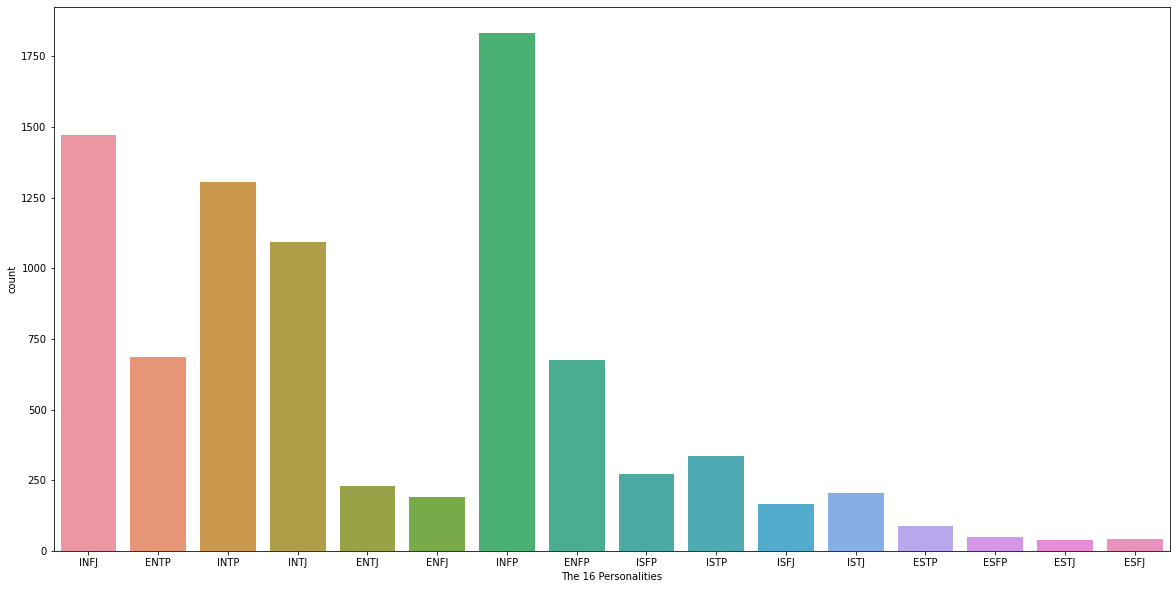

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=mb.type)
plt.xlabel('The 16 Personalities');

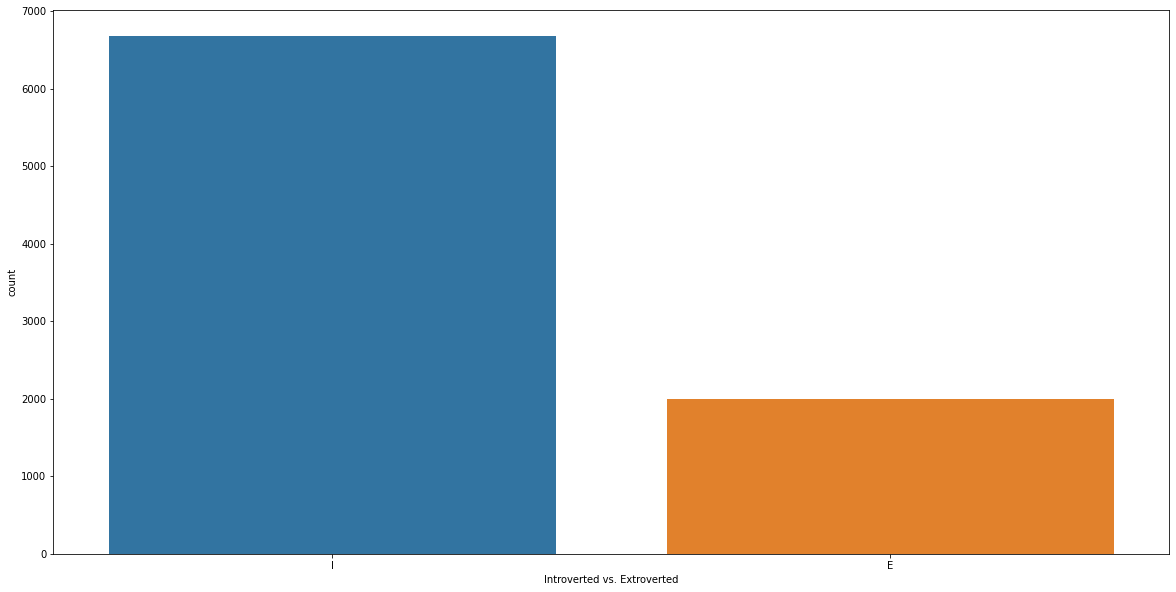

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=mb_I_E.type)
plt.xlabel('Introverted vs. Extroverted');

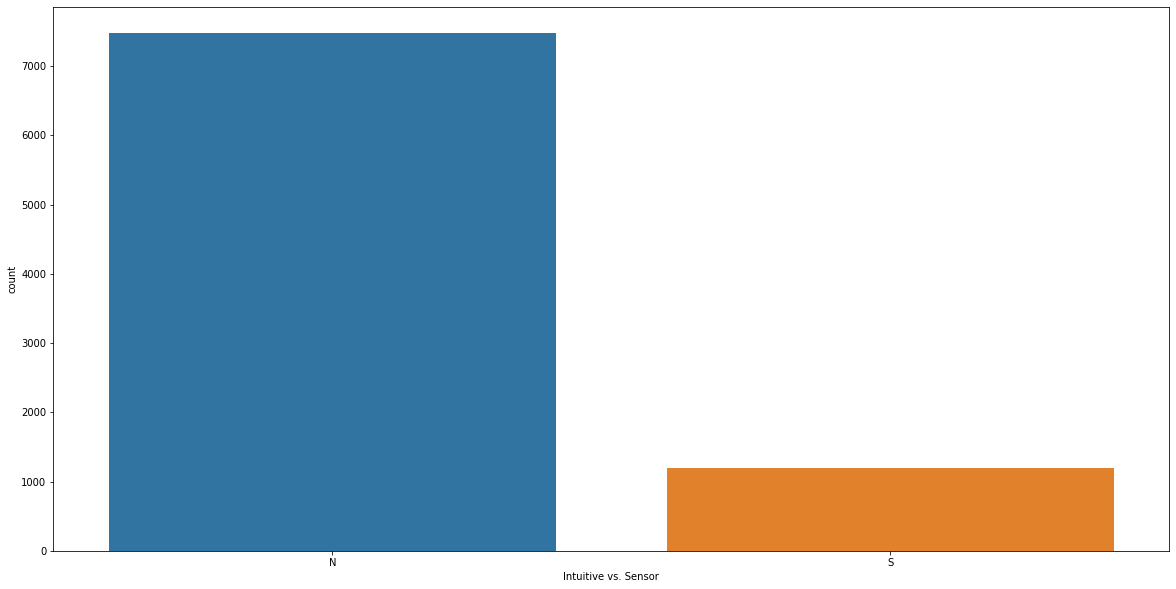

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=mb_N_S.type)
plt.xlabel('Intuitive vs. Sensor');

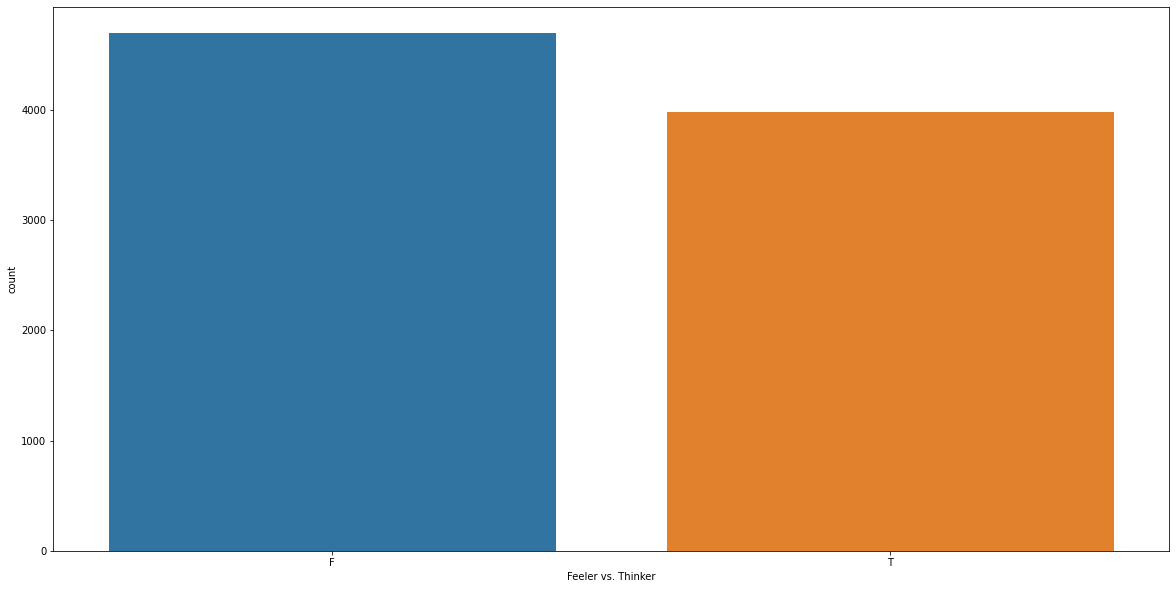

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=mb_F_T.type)
plt.xlabel('Feeler vs. Thinker');

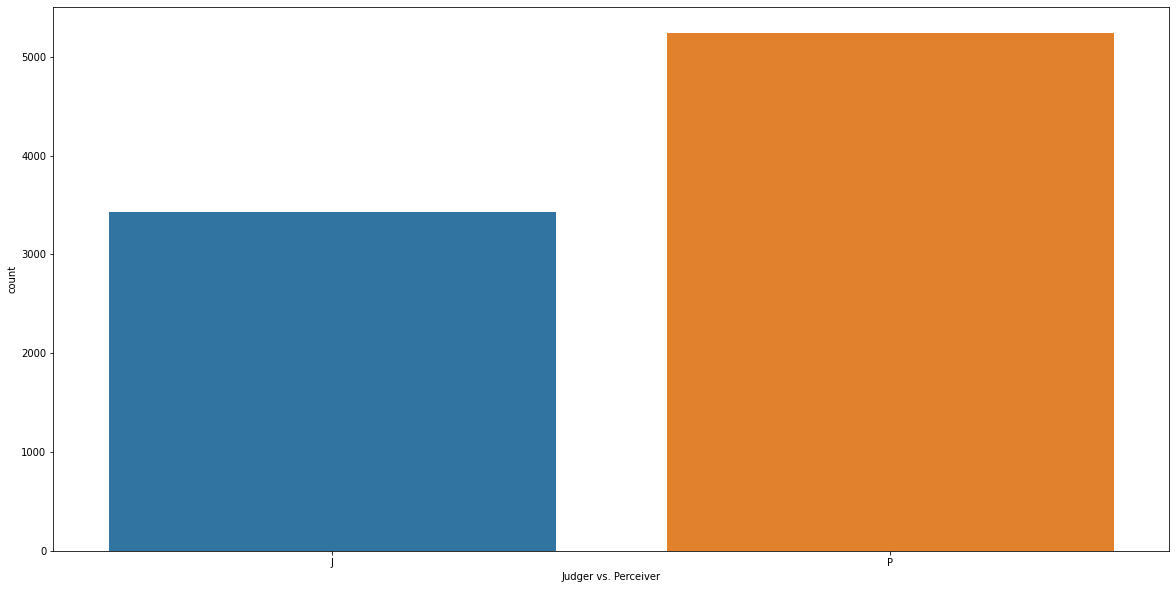

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=mb_J_P.type)
plt.xlabel('Judger vs. Perceiver');